#Importing neccessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

Loading the Datasets

In [2]:
loan_df = pd.read_csv('Loan_details.csv')
status_df = pd.read_csv('Loan_status.csv')
Branch_df = pd.read_csv('Branch_region_mapping.csv')
loan_df

,Loan_id,disbursed_amount,asset_cost,ltv,branch_id,Date.of.Birth,Employment.Type,DisbursalDate,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,1,36439,65850,56.19,64,14-06-1990,Self employed,28-09-2018,1,1,0,0,0,0,0,0,0yrs 0mon,0
1,2,48749,69303,72.15,67,01-01-1991,Salaried,10-09-2018,1,1,0,0,0,0,783,0,2yrs 6mon,0
2,3,55348,66340,85.00,2,16-08-1993,Self employed,31-08-2018,1,1,0,0,0,0,0,0,0yrs 0mon,0
3,4,48849,64133,77.96,217,01-01-1989,Self employed,13-10-2018,1,1,0,0,0,0,0,0,0yrs 0mon,0
4,5,40394,59386,70.72,74,31-12-1974,Self employed,14-09-2018,1,1,0,0,0,0,14,1,3yrs 1mon,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23310,23311,123661,185371,69.59,34,14-12-1982,Self employed,26-08-2018,1,1,0,0,0,0,650,0,5yrs 10mon,1
23311,23312,78879,122878,65.11,5,03-07-1993,Salaried,23-09-2018,1,1,0,0,0,0,680,0,0yrs 9mon,0
23312,23313,49349,67695,73.86,48,01-01-1994,Self employed,23-10-2018,1,1,0,0,0,0,825,0,2yrs 3mon,0
23313,23314,70897,84400,86.00,2,10-10-1982,Self employed,25-08-2018,1,1,0,0,0,0,657,0,0yrs 6mon,2


In [3]:
status_df 

,Loan_id,loan_default
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0
...,...,...
23310,23311,0
23311,23312,0
23312,23313,0
23313,23314,0


#Craeting Master dataframe by combining all subsidiary data

In [4]:
master_loandf = loan_df.join(Branch_df.set_index('branch_id'), on = 'branch_id' )
master_loandf = master_loandf.join(status_df.set_index('Loan_id'), on = 'Loan_id')
master_loandf


,Loan_id,disbursed_amount,asset_cost,ltv,branch_id,Date.of.Birth,Employment.Type,DisbursalDate,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,region,loan_default
0,1,36439,65850,56.19,64,14-06-1990,Self employed,28-09-2018,1,1,0,0,0,0,0,0,0yrs 0mon,0,South,0
1,2,48749,69303,72.15,67,01-01-1991,Salaried,10-09-2018,1,1,0,0,0,0,783,0,2yrs 6mon,0,South,0
2,3,55348,66340,85.00,2,16-08-1993,Self employed,31-08-2018,1,1,0,0,0,0,0,0,0yrs 0mon,0,East,1
3,4,48849,64133,77.96,217,01-01-1989,Self employed,13-10-2018,1,1,0,0,0,0,0,0,0yrs 0mon,0,North,0
4,5,40394,59386,70.72,74,31-12-1974,Self employed,14-09-2018,1,1,0,0,0,0,14,1,3yrs 1mon,1,South,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23310,23311,123661,185371,69.59,34,14-12-1982,Self employed,26-08-2018,1,1,0,0,0,0,650,0,5yrs 10mon,1,East,0
23311,23312,78879,122878,65.11,5,03-07-1993,Salaried,23-09-2018,1,1,0,0,0,0,680,0,0yrs 9mon,0,East,0
23312,23313,49349,67695,73.86,48,01-01-1994,Self employed,23-10-2018,1,1,0,0,0,0,825,0,2yrs 3mon,0,South,0
23313,23314,70897,84400,86.00,2,10-10-1982,Self employed,25-08-2018,1,1,0,0,0,0,657,0,0yrs 6mon,2,East,0


Detecting and treating missing values

In [5]:
master_loandf.isnull().sum()

Loan_id                                  0
disbursed_amount                         0
asset_cost                               0
ltv                                      0
branch_id                                0
Date.of.Birth                            0
Employment.Type                        770
DisbursalDate                            0
MobileNo_Avl_Flag                        0
Aadhar_flag                              0
PAN_flag                                 0
VoterID_flag                             0
Driving_flag                             0
Passport_flag                            0
PERFORM_CNS.SCORE                        0
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS      0
CREDIT.HISTORY.LENGTH                    0
NO.OF_INQUIRIES                          0
region                                   0
loan_default                             0
dtype: int64

In [6]:
master_loandf['Employment.Type'].value_counts()

Self employed    12724
Salaried          9821
Name: Employment.Type, dtype: int64

In [7]:
# replacing Nan values with a string 
master_loandf.replace(to_replace = np.nan, value = 'Unemployed', inplace = True)
master_loandf
master_loandf.isnull().sum()

Loan_id                                0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
Date.of.Birth                          0
Employment.Type                        0
DisbursalDate                          0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    0
CREDIT.HISTORY.LENGTH                  0
NO.OF_INQUIRIES                        0
region                                 0
loan_default                           0
dtype: int64

In [8]:
master_loandf['Employment.Type'].value_counts()

Self employed    12724
Salaried          9821
Unemployed         770
Name: Employment.Type, dtype: int64

Detecting Outliers and treating the dataset for outliers

C:\Users\shubdutta\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


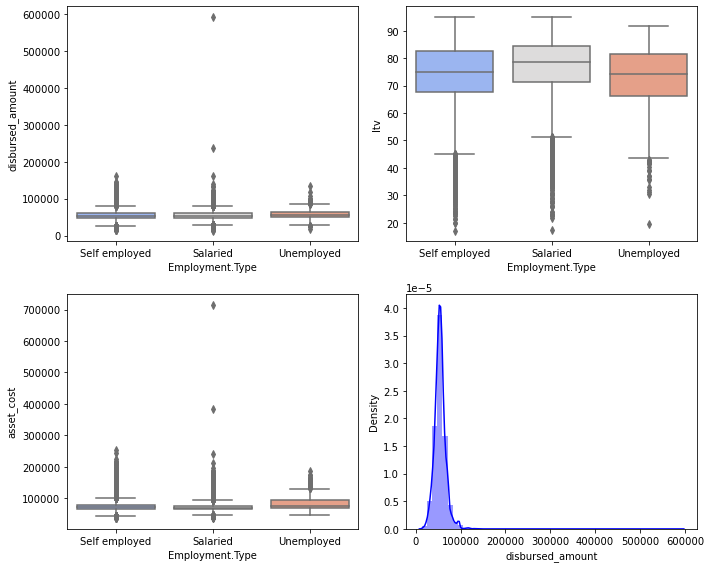

In [9]:
fig, axs = plt.subplots(2,2, figsize=(10,8))
sns.boxplot(x=master_loandf['Employment.Type'], y=master_loandf['disbursed_amount'], palette= 'coolwarm', ax = axs[0][0])
sns.boxplot(x=master_loandf['Employment.Type'], y=master_loandf['ltv'], palette= 'coolwarm', ax = axs[0][1])
sns.boxplot(x=master_loandf['Employment.Type'], y=master_loandf['asset_cost'], palette= 'coolwarm', ax = axs[1][0])
sns.distplot(a =master_loandf['disbursed_amount'], color = 'b', kde = True, ax = axs[1][1])
plt.tight_layout()

In [10]:
upper_limit = master_loandf['disbursed_amount'].quantile(0.9999)
lower_limit = master_loandf['disbursed_amount'].quantile(0.01)
print(upper_limit,lower_limit)

162078.69439999806 26336.0


In [11]:
master_loandf = master_loandf[master_loandf['disbursed_amount']<upper_limit]
master_loandf

,Loan_id,disbursed_amount,asset_cost,ltv,branch_id,Date.of.Birth,Employment.Type,DisbursalDate,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,region,loan_default
0,1,36439,65850,56.19,64,14-06-1990,Self employed,28-09-2018,1,1,0,0,0,0,0,0,0yrs 0mon,0,South,0
1,2,48749,69303,72.15,67,01-01-1991,Salaried,10-09-2018,1,1,0,0,0,0,783,0,2yrs 6mon,0,South,0
2,3,55348,66340,85.00,2,16-08-1993,Self employed,31-08-2018,1,1,0,0,0,0,0,0,0yrs 0mon,0,East,1
3,4,48849,64133,77.96,217,01-01-1989,Self employed,13-10-2018,1,1,0,0,0,0,0,0,0yrs 0mon,0,North,0
4,5,40394,59386,70.72,74,31-12-1974,Self employed,14-09-2018,1,1,0,0,0,0,14,1,3yrs 1mon,1,South,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23310,23311,123661,185371,69.59,34,14-12-1982,Self employed,26-08-2018,1,1,0,0,0,0,650,0,5yrs 10mon,1,East,0
23311,23312,78879,122878,65.11,5,03-07-1993,Salaried,23-09-2018,1,1,0,0,0,0,680,0,0yrs 9mon,0,East,0
23312,23313,49349,67695,73.86,48,01-01-1994,Self employed,23-10-2018,1,1,0,0,0,0,825,0,2yrs 3mon,0,South,0
23313,23314,70897,84400,86.00,2,10-10-1982,Self employed,25-08-2018,1,1,0,0,0,0,657,0,0yrs 6mon,2,East,0


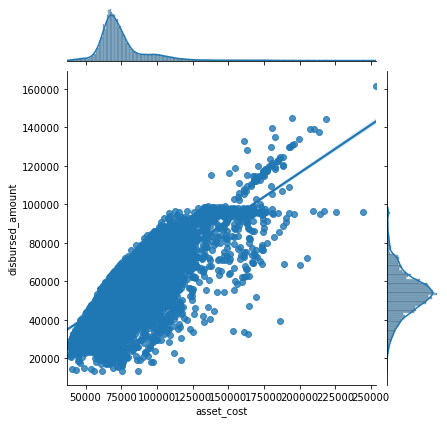

In [12]:
#Checking the relationship between correlated variables
sns.jointplot(x = master_loandf['asset_cost'], y = master_loandf['disbursed_amount'] , kind='reg')

Featurizing 'Age' to analyze demographic distribution of the dataset

In [13]:
DOB_series = pd.to_datetime(master_loandf['Date.of.Birth'])
Age_series = date.today().year - DOB_series.map(lambda dt: dt.year)
master_loandf['Age'] = Age_series
master_loandf

<ipython-input-13-02187dab6003>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_loandf['Age'] = Age_series


,Loan_id,disbursed_amount,asset_cost,ltv,branch_id,Date.of.Birth,Employment.Type,DisbursalDate,MobileNo_Avl_Flag,Aadhar_flag,...,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,region,loan_default,Age
0,1,36439,65850,56.19,64,14-06-1990,Self employed,28-09-2018,1,1,...,0,0,0,0,0,0yrs 0mon,0,South,0,31
1,2,48749,69303,72.15,67,01-01-1991,Salaried,10-09-2018,1,1,...,0,0,0,783,0,2yrs 6mon,0,South,0,30
2,3,55348,66340,85.00,2,16-08-1993,Self employed,31-08-2018,1,1,...,0,0,0,0,0,0yrs 0mon,0,East,1,28
3,4,48849,64133,77.96,217,01-01-1989,Self employed,13-10-2018,1,1,...,0,0,0,0,0,0yrs 0mon,0,North,0,32
4,5,40394,59386,70.72,74,31-12-1974,Self employed,14-09-2018,1,1,...,0,0,0,14,1,3yrs 1mon,1,South,0,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23310,23311,123661,185371,69.59,34,14-12-1982,Self employed,26-08-2018,1,1,...,0,0,0,650,0,5yrs 10mon,1,East,0,39
23311,23312,78879,122878,65.11,5,03-07-1993,Salaried,23-09-2018,1,1,...,0,0,0,680,0,0yrs 9mon,0,East,0,28
23312,23313,49349,67695,73.86,48,01-01-1994,Self employed,23-10-2018,1,1,...,0,0,0,825,0,2yrs 3mon,0,South,0,27
23313,23314,70897,84400,86.00,2,10-10-1982,Self employed,25-08-2018,1,1,...,0,0,0,657,0,0yrs 6mon,2,East,0,39


#Assessing the dataset based on Defaulted status

In [14]:
dflt_pct = master_loandf['loan_default'].value_counts()[1]/len(master_loandf['loan_default'])*100
print('{:2f}%'.format(dflt_pct))

21.988675%


It suggests that the majority of the data belongs to the NotDefaulted category which may lead to majority oversampling if the whole dataset is considered for training the model

In [15]:
defaulted_df = master_loandf[master_loandf['loan_default']==1]
defaulted_df

,Loan_id,disbursed_amount,asset_cost,ltv,branch_id,Date.of.Birth,Employment.Type,DisbursalDate,MobileNo_Avl_Flag,Aadhar_flag,...,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,region,loan_default,Age
2,3,55348,66340,85.00,2,16-08-1993,Self employed,31-08-2018,1,1,...,0,0,0,0,0,0yrs 0mon,0,East,1,28
9,10,34639,69717,50.49,34,23-11-1982,Self employed,26-10-2018,1,1,...,0,0,0,300,0,3yrs 10mon,0,East,1,39
19,20,78151,107074,74.25,135,05-06-1987,Self employed,25-10-2018,1,1,...,1,0,0,0,0,0yrs 0mon,0,West,1,34
26,27,45795,61513,76.41,73,15-09-1978,Salaried,20-09-2018,1,1,...,0,0,0,0,0,0yrs 0mon,0,South,1,43
27,28,53303,63376,86.78,3,16-09-1989,Salaried,07-09-2018,1,1,...,0,0,0,710,0,0yrs 6mon,0,East,1,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23279,23280,39664,62270,66.28,36,02-09-1968,Salaried,09-08-2018,1,0,...,1,0,0,694,0,5yrs 1mon,0,East,1,53
23281,23282,49850,87344,58.39,138,01-01-1988,Self employed,06-09-2018,1,1,...,0,0,0,0,0,0yrs 0mon,0,West,1,33
23284,23285,43617,58075,79.90,105,01-01-1988,Salaried,31-08-2018,1,1,...,0,0,0,0,0,0yrs 0mon,0,West,1,33
23289,23290,53303,65728,83.68,16,01-01-1991,Salaried,08-08-2018,1,1,...,0,0,0,0,0,0yrs 0mon,0,East,1,30


Analyzing the dataset based on categorical data such as 'Region','Employment Type','CNS Score' and 'Delinquent Account count'

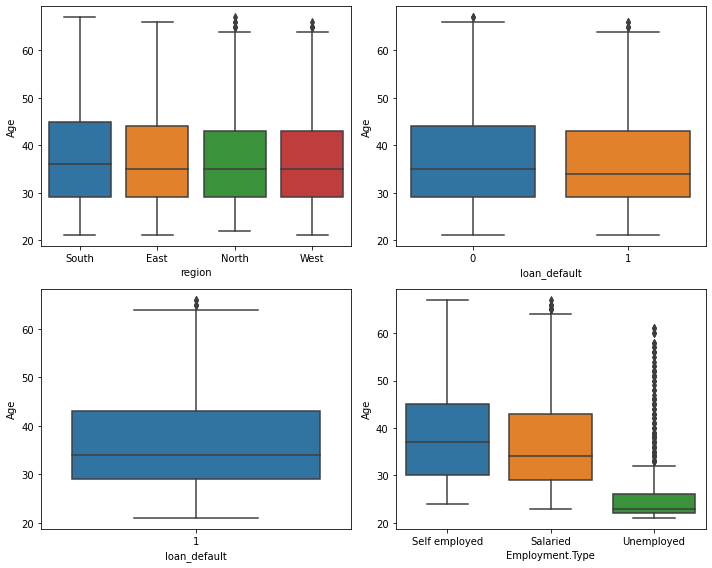

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(10,8))
sns.boxplot(x = master_loandf['region'], y = master_loandf['Age'], ax= axs[0][0])
sns.boxplot(x = master_loandf['loan_default'], y = master_loandf['Age'], ax= axs[0][1])
sns.boxplot(x = defaulted_df['loan_default'], y = defaulted_df['Age'], ax= axs[1][0])
sns.boxplot(x = master_loandf['Employment.Type'], y = master_loandf['Age'], ax= axs[1][1])
plt.tight_layout()

From the above it can be deduced that lower age group is majorly unemployed and are more susceptible to default.

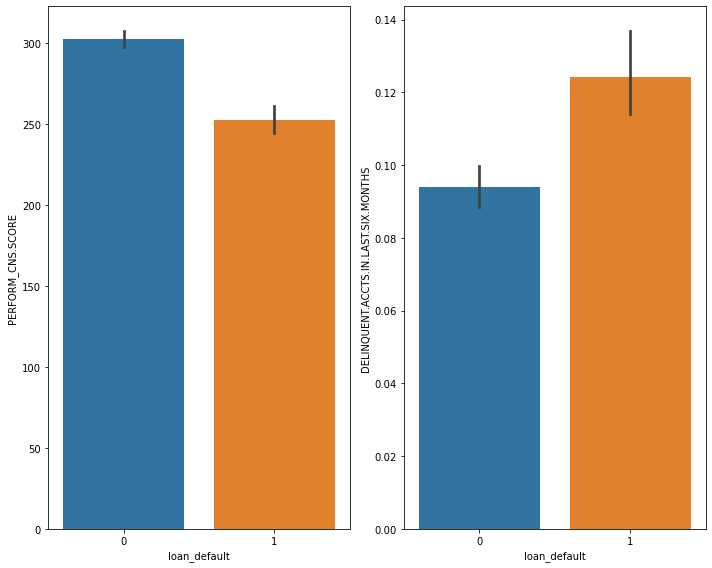

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(10,8))
sns.barplot(x = master_loandf['loan_default'], y = master_loandf['PERFORM_CNS.SCORE'], ax = axs[0])
sns.barplot(x = master_loandf['loan_default'], y = master_loandf['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'], ax = axs[1])
plt.tight_layout()

From the above it is evident that Insdividuals with lower score and high Delinquent accounts are more susceptible to default.